
# Project: Investigate a Dataset - TMDb 5000 Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project is an analysis of a dataset about over 10,000 movies collected from The Movie Database (TMDb). It contains information about the movies including its budget, revenue, cast, producers, user ratings e.t.c.

#### Source
The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). Although the dataset used for my analysis is a cleaned version from the original dataset and I downloaded from a Google [doc](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&source=editors&ust=1671519053764597&usg=AOvVaw1JntJyMX-5-vKvYFrRAxIi) file provided by Udacity

#### Some of the columns in the dataset are as follows

+ id: Unique integer identifier for each movie
+ imdb_id: IMDb id of each movie
+ popularity: popularity of each movie in float
+ budget: budget (money invested in the making of each movie) of each movie in float
+ revenue: total money made from each movie in float
+ original_title: The original title of a movie
+ cast: Actors/actresses who starred in the movie
+ runtime: Total duration of the movie in minutes
+ genres: Tenres of the movie. primary and secondary genres are seperated with pipe operators

### Questions for Analysis
For this analysis I will attempt to answer the following questions
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?
3. Which movies made the most profit?
4. Who directed the most successful movies?

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [4]:
# Load the dataset
df = pd.read_csv('C:/Users/Equan/Downloads/movie_project/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Look at the number of rows and columns
df.shape

(10866, 21)

In [6]:
# Look at the column data types and non-null value count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The columns have appropriate data types and column names

In [7]:
# Check the total nul values of each column in the dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Some columns like homepage, tagline, keywords and production_companies have too many null values

In [8]:
# Statistical overview of numerical columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It looks like important columns such as budget and revenue have records with zero value

In [9]:
# Check for duplicates
df.duplicated().sum()

1

There is one(1) duplicate which will be dropped in the Data Cleaning section


### Data Cleaning
 

Drop those columns with too many null values and a few other columns I will not be using for analysis

In [10]:
df.drop(['homepage','tagline','keywords','production_companies','overview'], axis=1, inplace=True)

In [11]:
# Check if the columns were successfully dropped
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

As stated earlier, the column names and data types are appropriate and do not need to be changed 

#### Null values

In [12]:
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

I decided not to drop null values because the columns containing null values are non_numerical and the count of null values is not very signficant

#### Duplicates

While assessing the dataset, I found one duplicate

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
# Check if duplicate was dropped successfully
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 
#### Which genres are the most popular from year to year?

My approach is first to split the genre column (which is seperated by pipe operators) into two; main and unwanted. After that I groupby release year and main genre columns, turn it into a DataFrame, then get the maximum value count for each year

In [15]:
# look at the genres column
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10865, dtype: object

Values in the column are seperated by pipe operators

In [16]:
# Split genres column in two
df[['main_genre','unwanted_genres']] = df['genres'].str.split('|', n=1, expand=True)

Code to split the column gotten with help from a friend

In [17]:
# look at the columns of the DataFrame
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'main_genre', 'unwanted_genres'],
      dtype='object')

Because of the split, genres and unwanted_genres columns are not useful to my analysis so they will be dropped

In [18]:
df.drop(['genres','unwanted_genres'], axis=1, inplace=True)

In [19]:
# Look at the columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'main_genre'],
      dtype='object')

In [20]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


In [21]:
# Look at release_year column
df['release_year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, Length: 10865, dtype: int64

It would be more helpful to look the unique values of the column

In [22]:
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [23]:
# How many unique years are represented in the column?
df['release_year'].nunique()

56

Groupby() release_year and main_genre (get the value count). Save it in a variable

In [24]:
movie_genre = df.groupby('release_year')['main_genre'].value_counts()
movie_genre

release_year  main_genre
1960          Action         8
              Comedy         7
              Horror         6
              Drama          5
              Thriller       3
                            ..
2015          Music         10
              History        7
              TV Movie       6
              War            3
              Western        2
Name: main_genre, Length: 829, dtype: int64

In [25]:
type(movie_genre)

pandas.core.series.Series

movie_genre is a Series now. It should be turned into a DataFrame using to_frame() method for better manipulation

In [26]:
movie_genre = movie_genre.to_frame()

In [27]:
# Check the if the type has changed
type(movie_genre)

pandas.core.frame.DataFrame

In [28]:
movie_genre

main_genre
release_year main_genre            
1960         Action               8
             Comedy               7
             Horror               6
             Drama                5
             Thriller             3
...                             ...
2015         Music               10
             History              7
             TV Movie             6
             War                  3
             Western              2

[829 rows x 1 columns]

value_counts() sorts by desceding order so I know the first value of each group is the highest genre count

I had help from this [site](https://www.includehelp.com/python/how-to-get-first-row-of-each-group-in-pandas-dataframe.aspx#:~:text=First%20row%20means%20that%20index,groupby()%20method.) to get the first value of every group of year

In [29]:
movie_genre.groupby('release_year', as_index=False).nth(0)

,,main_genre
release_year,main_genre,
1960,Action,8
1961,Comedy,8
1962,Drama,11
1963,Comedy,9
1964,Comedy,10
1965,Drama,11
1966,Action,11
1967,Comedy,11
1968,Drama,10


### Research Question 2 
#### What kind of properties are associated with movies that have high revenue?

My approach to answering this question is to plot scatterplots of revenue against other numerical columns

`df.describe()` shows numerical columns

In [30]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Create a function that plots revenue against desired target to avoid repeating code

In [31]:
def plot_revenue_vs_target(target):
    """
    Function makes a scatterplot of revenue column against the column
    supplied in the argument when the function is called.
    Input: Column to be plotted against revenue column
    Output: Scatterplot of revenue vs target column passed as argument in the functiom
    """
    df.plot(x='revenue',y=target,kind='scatter');
    # After plotting, tidy up labels
    target = target.replace('_',' ') # Replace _ with a space
    # Add title and format it
    plt.title(f"Relationship between {target} and revenue".title(), fontsize=12, weight='bold')
    # Add x and y labels
    plt.xlabel('revenue'.title(), fontsize=10, weight='bold')
    plt.ylabel(target.title(), fontsize=10, weight='bold')

#### Revenue vs Popularity

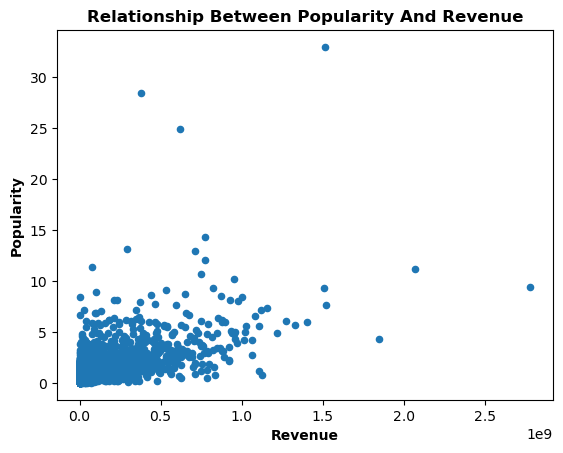

In [32]:
plot_revenue_vs_target('popularity')

This looks like a postive correlation but I am not sure so I would employ Seaborn's regplot. A regression line might help me come to a conclusion 

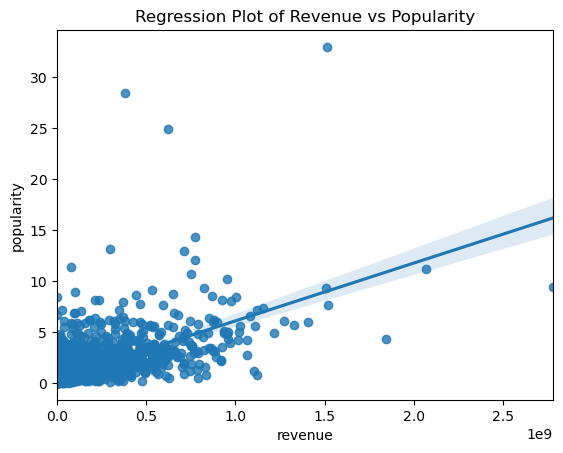

In [33]:
sns.regplot(x='revenue',
            y='popularity',
            data=df).set(title='Regression Plot of Revenue vs Popularity');

It is a positive correlation. Revenue and Popularity are positively correlated

#### Revenue vs Budget

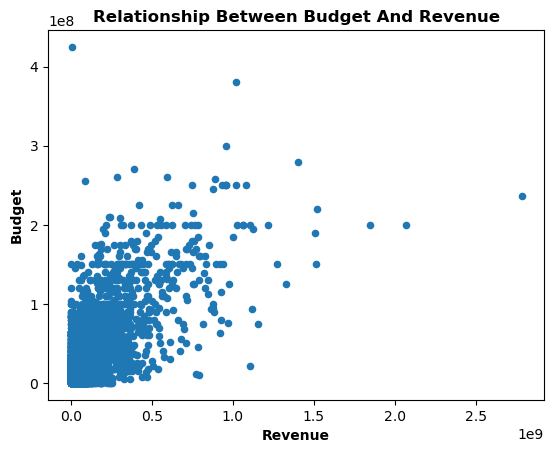

In [34]:
plot_revenue_vs_target('budget')

Revenue and Budget are postively correlated

#### Revenue vs Runtime

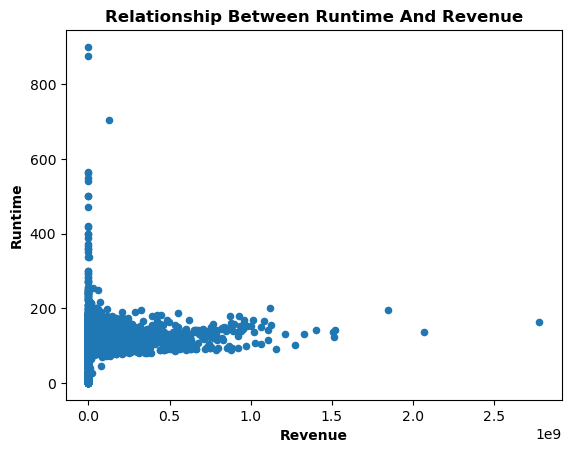

In [35]:
plot_revenue_vs_target('runtime')

There exists no correlation between Revenue and Runtime

#### Revenue vs Vote Count

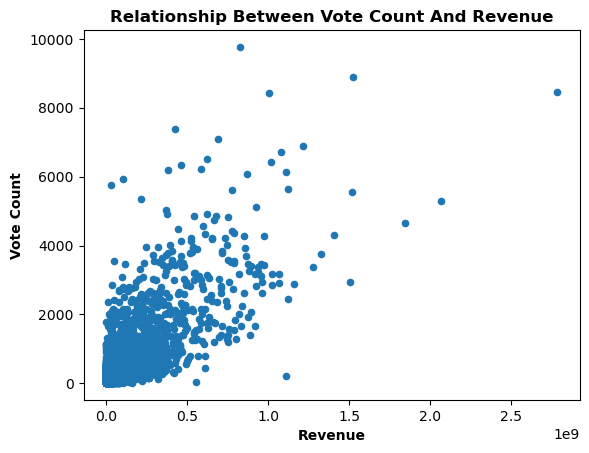

In [36]:
plot_revenue_vs_target('vote_count')

There exists a positive correlation between Revenue and Vote Count

#### Revenue vs Vote Average

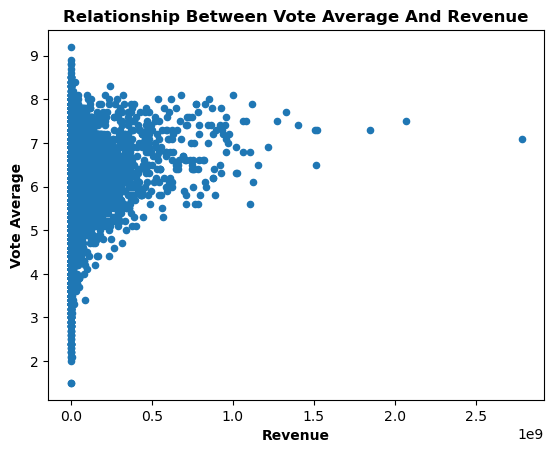

In [37]:
plot_revenue_vs_target('vote_average')

I should once again get help from Seaborn.

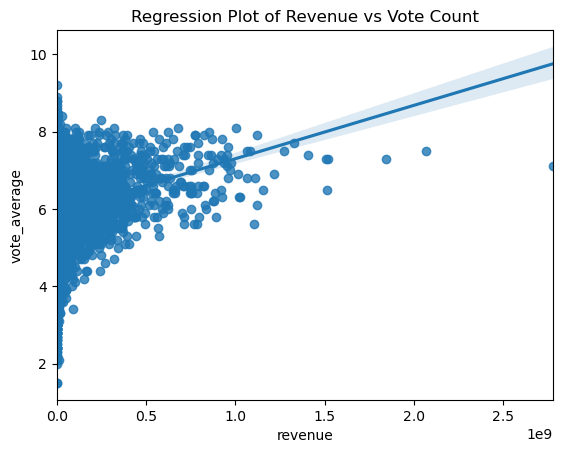

In [38]:
sns.regplot(x='revenue',y='vote_average',data=df).set(title='Regression Plot of Revenue vs Vote Count');

There exists a positive correlation between Revenue and Vote Average 

So therefore revenue is positively correlated with budget, popularity, vote_count and vote_average

### Reseach Question 3
#### Which movies made the most profit?

A new column named Profit will be created which is difference between budget and revenue

Profit = Revenue - Budget

The `describe()` method shows columns with zero values so the rows with zero values in both revenue and budget columns will be dropped.

In [39]:
# Check number of rows before dropping
len(df.index)

10865

Drop rows with revenue equal to zero. Help from [this](https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value) Stackoverflow post

In [40]:
df = df[df['revenue'] != 0]

In [41]:
# Check number of rows after dropping
len(df.index)

4849

Drop rows with budget equal to zero

In [42]:
df = df[df['budget'] != 0]

In [43]:
# Check number of rows after dropping
len(df.index)

3854

In [44]:
df['profit'] = df['revenue'] - df['budget']

In [45]:
# Look at the newly created column
df['profit']

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10822      26236689
10828      10000000
10829       1347000
10835       8000000
10848       6885000
Name: profit, Length: 3854, dtype: int64

See top 10 movies with the highest profit. Help from the [documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html)

In [46]:
# See top 10 movies with the highest profit
top_10_profit = df.nlargest(10, 'profit')
top_10_profit

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,Action,2544505847
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,1868178225
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,Drama,1645034188
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,1363528810
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,1316249360
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,Science Fiction,1299557910
3374,12445,tt1201607,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09,Adventure,1202817822
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09,Action,1125035767
5422,109445,tt2294629,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09,Animation,1124219009
8094,1642,tt0113957,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,7/28/95,201,5.6,1995,3.148127e+07,1.583050e+09,Crime,1084279658


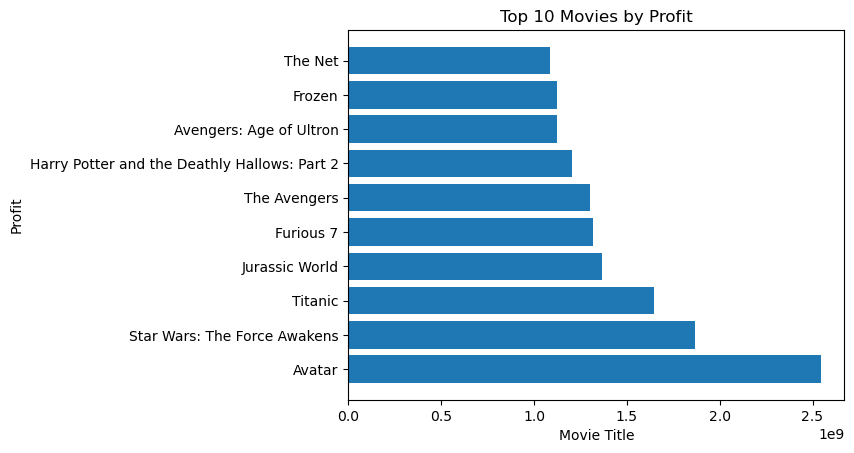

In [47]:
# Plot a horizontal bar graph to visuzalize the result
plt.barh(top_10_profit['original_title'], top_10_profit['profit'])
plt.title('Top 10 Movies by Profit')
plt.xlabel('Movie Title')
plt.ylabel('Profit');

### Question 4
#### Who directed the most sucessful movies?

I want to answer the question, "Who directed the movies with the highest revenue?"

In [48]:
director_revenue = df.groupby('director')['revenue'].sum()

In [49]:
director_revenue.idxmax()

'Steven Spielberg'

The director of the movies with the highest cummulative revenue is Steven Speilberg

<a id='conclusions'></a>
## Conclusions

1. Through the years, comedy and drama seem to be the most dominating genres in the movie industry which is understandable because people like to laugh a lot (including me), since it helps relax and reduces the stress of our daily lives. Also drama because people like being told suspenseful stories that keeps them entertained.

2. Investigating the dataset showed positive correlation between revenue and  other columns including budget, popularity, vote_count, vote_average. Which may suggest that popular movies with high budget usually end up generating high revenues. While the duration of the movie has little effect on the generated revenue as indicated by poor correlation in the scatterplot.

3. Steven Speilberg, the director of **Jurassic Park** and **Catch Me If You Can** (I know because I have seen the movies) was found to be the director associated with the highest revenue movies cummlatively. But this result is limited because over 6000 rows have zero values for revenue. This is one limitation of my analysis.

4. Another limitation of my analysis is that I did neither inferential statistics nor machine learning.